In [ ]:
!pip install git+https://github.com/facebookresearch/detectron2.git

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-z5dnr8ll
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-z5dnr8ll
  Resolved https://github.com/facebookresearch/detectron2.git to commit c69939aa85460e8135f40bce908a6cddaa73065f
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 3.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.2/79.2 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 48.5 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch, torchvision
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

import os
import json
import random
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

from detectron2 import model_zoo
from detectron2.engine import DefaultTrainer, DefaultPredictor
from detectron2.config import get_cfg
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.data.datasets import register_coco_instances
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.utils.visualizer import Visualizer


In [ ]:
%cd "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2"

/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2


In [ ]:
import json
import os

# Paths to your annotation file and image directory
val_ann_file = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_validation_annotations.json"
val_img_dir = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/val/images"

# Load the COCO annotation file
with open(val_ann_file, 'r') as f:
    annotations = json.load(f)

# Create a set of available image file names in the image directory
available_images = set(os.listdir(val_img_dir))

# Filter out images that don't exist in the directory
filtered_images = []
filtered_annotations = []

for img in annotations['images']:
    if os.path.basename(img['file_name']) in available_images:
        filtered_images.append(img)
    else:
        print(f"Missing image: {img['file_name']}")

# Get IDs of the remaining images
valid_image_ids = {img['id'] for img in filtered_images}

# Filter annotations to include only those belonging to the valid images
filtered_annotations = [
    ann for ann in annotations['annotations'] if ann['image_id'] in valid_image_ids
]

# Update the annotations dictionary
annotations['images'] = filtered_images
annotations['annotations'] = filtered_annotations

# Save the updated annotation file
new_ann_file = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_val_annotations_fixed.json"
with open(new_ann_file, 'w') as f:
    json.dump(annotations, f)

print(f"Updated annotation file saved at: {new_ann_file}")

Missing image: 9d53e8b2-679d-11e5-90f4-40f2e96c8ad8.jpg
Updated annotation file saved at: /content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_val_annotations_fixed.json


In [ ]:
import json
import os

# Paths to your annotation file and image directory
train_ann_file = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_training_annotations.json"
train_img_dir = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/train/images"

# Load the COCO annotation file
with open(train_ann_file, 'r') as f:
    annotations = json.load(f)

# Create a set of available image file names in the image directory
available_images = set(os.listdir(train_img_dir))

# Filter out images that don't exist in the directory
filtered_images = []
filtered_annotations = []

for img in annotations['images']:
    if os.path.basename(img['file_name']) in available_images:
        filtered_images.append(img)
    else:
        print(f"Missing image: {img['file_name']}")

# Get IDs of the remaining images
valid_image_ids = {img['id'] for img in filtered_images}

# Filter annotations to include only those belonging to the valid images
filtered_annotations = [
    ann for ann in annotations['annotations'] if ann['image_id'] in valid_image_ids
]

# Update the annotations dictionary
annotations['images'] = filtered_images
annotations['annotations'] = filtered_annotations

# Save the updated annotation file
new_ann_file = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_training_annotations_fixed.json"
with open(new_ann_file, 'w') as f:
    json.dump(annotations, f)

print(f"Updated annotation file saved at: {new_ann_file}")

Missing image: 51c849d2-679e-11e5-990f-40f2e96c8ad8.jpg
Missing image: 9f366cd8-67a0-11e5-a3d2-40f2e96c8ad8.jpg
Updated annotation file saved at: /content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_training_annotations_fixed.json


In [ ]:
train_img_dir = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/train/images"
train_ann_file = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_training_annotations_fixed.json"
val_img_dir = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/val/images"
val_ann_file = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_val_annotations_fixed.json"

# Use new names: "garbage_train_new" and "garbage_val_new"
register_coco_instances("garbage_train_new", {}, train_ann_file, train_img_dir)
register_coco_instances("garbage_val_new", {}, val_ann_file, val_img_dir)

garbage_metadata = MetadataCatalog.get("garbage_train_new")
dataset_dicts = DatasetCatalog.get("garbage_train_new")


[12/19 13:09:49 d2.data.datasets.coco]: Loaded 1319 images in COCO format from /content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_training_annotations_fixed.json


In [ ]:
import os

# List contents of the parent directory
base_dir = "/content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2"
print(os.listdir(base_dir))

['Updated_Train.ipynb', 'annotation_checker2.py', 'coco_training_annotations.json', 'coco_validation_annotations.json', 'train', 'val', 'output_detectron2', 'Train2.ipynb', 'coco_val_annotations_fixed.json', 'coco_training_annotations_fixed.json']


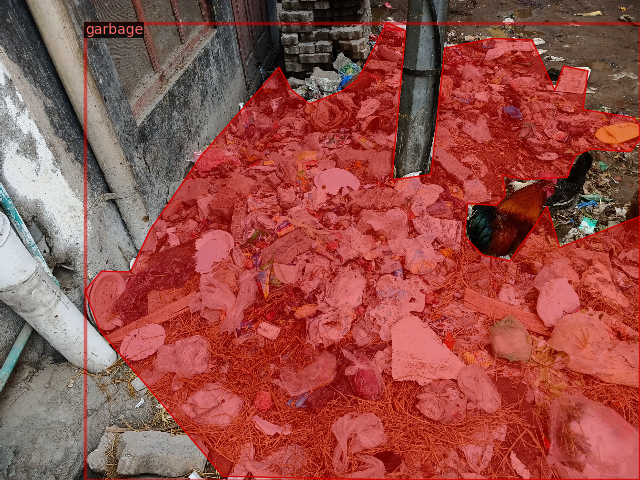

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer
import cv2

random_sample = random.choice(dataset_dicts)
img = cv2.imread(random_sample["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=garbage_metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(random_sample)
from google.colab.patches import cv2_imshow
cv2_imshow(vis.get_image()[:, :, ::-1])

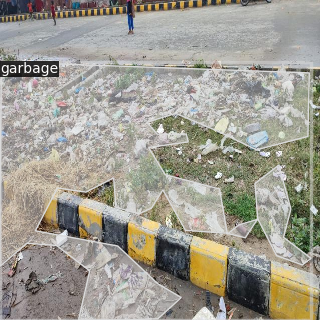

In [ ]:
import random
from detectron2.utils.visualizer import Visualizer

random_sample = random.choice(dataset_dicts)
img = cv2.imread(random_sample["file_name"])
visualizer = Visualizer(img[:, :, ::-1], metadata=garbage_metadata, scale=0.5)
vis = visualizer.draw_dataset_dict(random_sample)
cv2_imshow(vis.get_image()[:, :, ::-1])


In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("garbage_train_new",)
cfg.DATASETS.TEST = ("garbage_val_new",)
cfg.DATALOADER.NUM_WORKERS = 2

# Load pretrained model weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

# One class (Garbage)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1

# Training parameters
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 1500
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128

# Resize to 640x640
cfg.INPUT.MIN_SIZE_TRAIN = (640,)
cfg.INPUT.MAX_SIZE_TRAIN = 640
cfg.INPUT.MIN_SIZE_TEST = 640
cfg.INPUT.MAX_SIZE_TEST = 640

cfg.TEST.EVAL_PERIOD = 10

cfg.OUTPUT_DIR = "output_detectron2"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)

In [ ]:
class MyTrainer(DefaultTrainer):
    @classmethod
    def build_evaluator(cls, cfg, dataset_name, output_folder=None):
        if output_folder is None:
            output_folder = os.path.join(cfg.OUTPUT_DIR, "inference")
        # Updated the arguments for COCOEvaluator
        return COCOEvaluator(dataset_name, distributed=True, output_dir=output_folder)

In [ ]:
trainer = MyTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[12/19 13:10:19 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 177MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[12/19 13:10:20 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3595.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[12/19 13:10:32 d2.data.datasets.coco]: Loaded 213 images in COCO format from /content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/Updated Detectron Train/OPEN_dETECTRON2/coco_val_annotations_fixed.json
[12/19 13:10:32 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|  garbage   | 218          |
|            |              |
[12/19 13:10:32 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(640, 640), max_size=640, sample_style='choice')]
[12/19 13:10:32 d2.data.common]: Serializing the dataset using: <class 'detectron2.data.common._TorchSerializedList'>
[12/19 13:10:32 d2.data.common]: Serializing 213 elements to byte tensors and concatenating them all ...
[12/19 13:10:32 d2.data.common]: Serialized dataset takes 0.38 MiB
[12/19 13:10:32 d2.evaluation.evaluator]: Start inference on 213 batches
[12/19 13:10:35 d2.evaluation.evaluator]: Inference

In [ ]:
# Use the same dataset name that was used for training/registration
evaluator = COCOEvaluator("garbage_val_new", distributed=False, output_dir=cfg.OUTPUT_DIR)
val_loader = detectron2.data.build_detection_test_loader(cfg, "garbage_val_new")
metrics = inference_on_dataset(trainer.model, val_loader, evaluator)
print(metrics)


[12/10 20:31:46 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...


roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[12/10 20:31:46 d2.data.datasets.coco]: Loaded 198 images in COCO format from /content/drive/Othercomputers/My Laptop/NSU/CSE/CSE498R/SEGMENTATION TRAINING/DETECTRON2/evODWS_validation_dataset.json


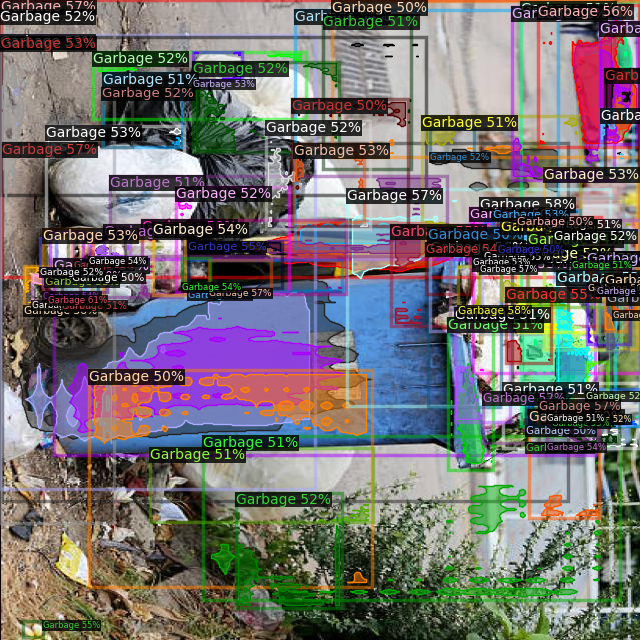

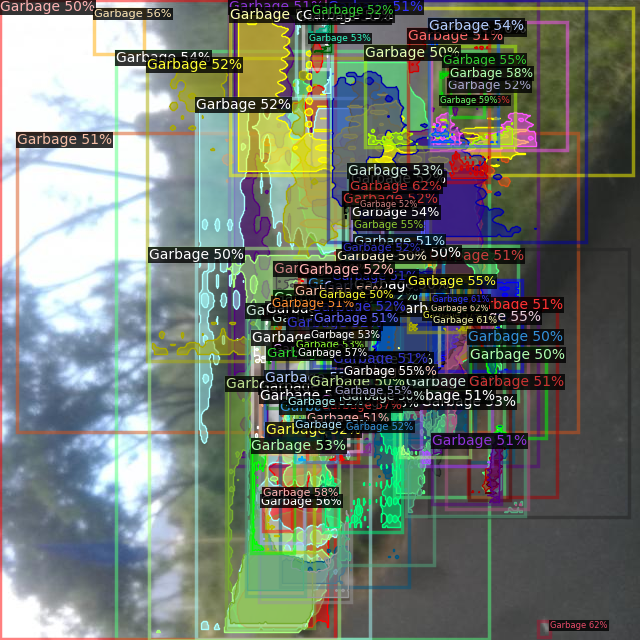

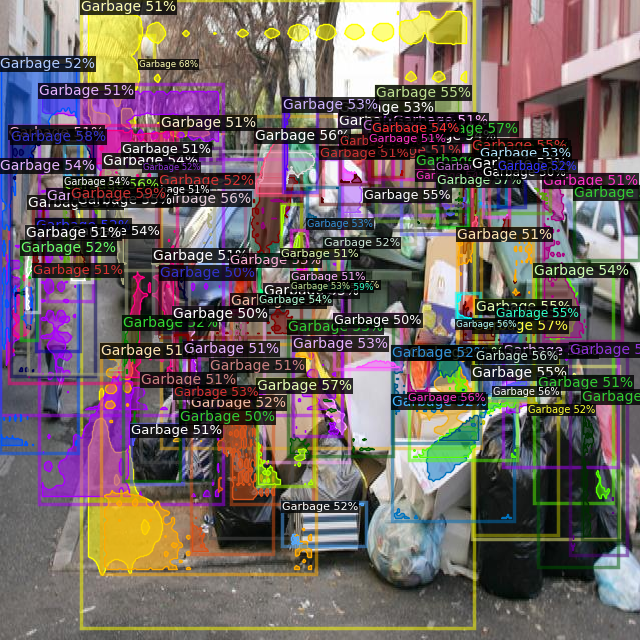

In [ ]:
# Let's pick a random image from the validation set and visualize predictions
predictor = DefaultPredictor(cfg)

val_dataset_dicts = DatasetCatalog.get("garbage_val_new")
for d in random.sample(val_dataset_dicts, 3):
    im = cv2.imread(d["file_name"])
    outputs = predictor(im)
    v = Visualizer(im[:, :, ::-1], metadata=garbage_metadata, scale=1.0)
    out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(out.get_image()[:, :, ::-1])
